# Example channel clustering simulation

The following code will randomly place N points on a disc of radius r. The number of channels at each point is pulled from a Poisson distribution of mean lambda. After positioning the channels the number of channels in a patch is simulated by creating n_centroids number of discs with radius r_sub randomly placed on the larger disc and counting the numer of channels in each. A channel is considered part of the patch if the point is within a distance r_sub from the patch center. The simulations are normalized such that the total number of channels present in the larger disc area vary about the same mean.

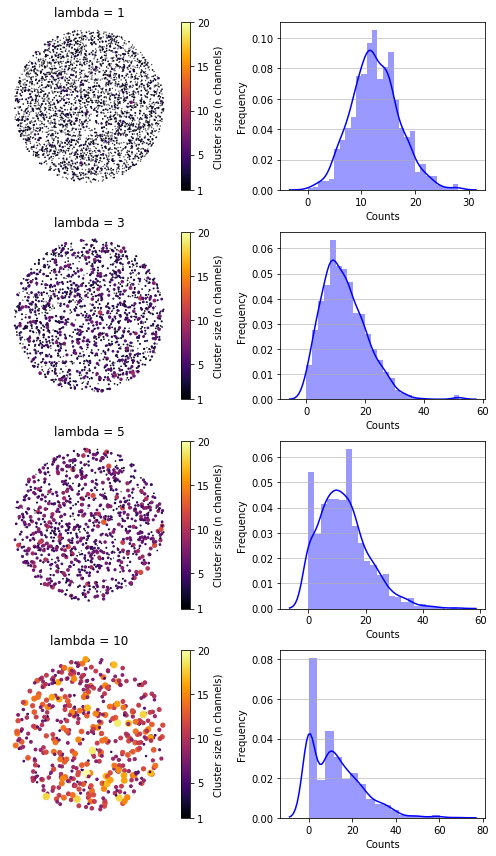

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import distance

sizes = [1, 3, 5, 10]
titles = ['lambda = 1', 'lambda = 3', 'lambda = 5', 'lambda = 10']
fig, axs = plt.subplots(len(sizes), 2, figsize=(7, len(sizes) * 3))

for i in range(0, len(sizes)):

    r = 1
    mean_clusterSize = sizes[i]
    N = round(5000/mean_clusterSize)

    s = np.random.poisson(mean_clusterSize, N)

    thetas = 2*np.pi*np.random.uniform(0, 1, N)
    rhos = r*np.sqrt(np.random.uniform(0, 1, N))

    xx = rhos * np.cos(thetas)
    yy = rhos * np.sin(thetas)
    coords = np.array(([xx, yy])).T

    norm = mpl.colors.Normalize(vmin=1, vmax=20)

    scatter = axs[i, 0].scatter(xx, yy, marker='.', s=0.5*s**2, c=s, cmap='inferno', norm=norm)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(titles[i])
    fig.colorbar(scatter, ticks=[1, 5, 10, 15, 20], label='Cluster size (n channels)', ax=axs[i, 0])

    r_sub = 0.05
    n_centroids = 1000
    num_inscribed = np.zeros(n_centroids)

    theta_subs = 2*np.pi*np.random.uniform(0, 1, n_centroids)
    rho_subs = (r-r_sub)*np.sqrt(np.random.uniform(0, 1, n_centroids))

    x_subs = rho_subs * np.cos(theta_subs)
    y_subs = rho_subs * np.sin(theta_subs)
    sub_coords = np.array(([x_subs, y_subs])).T

    dist = distance.cdist(coords, sub_coords, 'euclidean')
    #for i in sub_coords:
        #circle = plt.Circle((i[0], i[1]), r_sub, color='black', alpha=0.05)
        #axs[0].add_artist(circle)

    for j in range(n_centroids):
        num_inscribed[j] = np.sum(s[np.where(dist[:, j] <= r_sub)])

    sns.distplot(num_inscribed, color="b", ax=axs[i,1])

    axs[i,1].grid(axis='y', alpha=0.75)
    axs[i,1].set_xlabel('Counts')
    axs[i,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
